<a href="https://colab.research.google.com/github/ted-marlon/Data-Science/blob/main/Mod%C3%A9lisation_VECM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des bibliothèques nécessaires

In [ ]:
import statsmodels.datasets.interest_inflation.data as d
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.base.datetools import dates_from_str
import pandas

In [ ]:
# Load data
df = d.load_pandas().data
dates = df[["year", "quarter"]].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
data = df[["Dp", "R"]]
data.index = pandas.DatetimeIndex(quarterly)

In [ ]:
data

,Dp,R
1972-06-30,-0.003133,0.083
1972-09-30,0.018871,0.083
1972-12-31,0.024804,0.087
1973-03-31,0.016278,0.087
1973-06-30,0.000290,0.102
...,...,...
1997-12-31,0.024245,0.051
1998-03-31,-0.014647,0.047
1998-06-30,-0.002049,0.047
1998-09-30,0.002475,0.041


Dp: la variation des prix et R qui est le taux d'intérêt...

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 1972-06-30 to 1998-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dp      107 non-null    float64
 1   R       107 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [ ]:
data.isnull().sum()

,0
Dp,0
R,0


# Analyse de l'évolution des variables

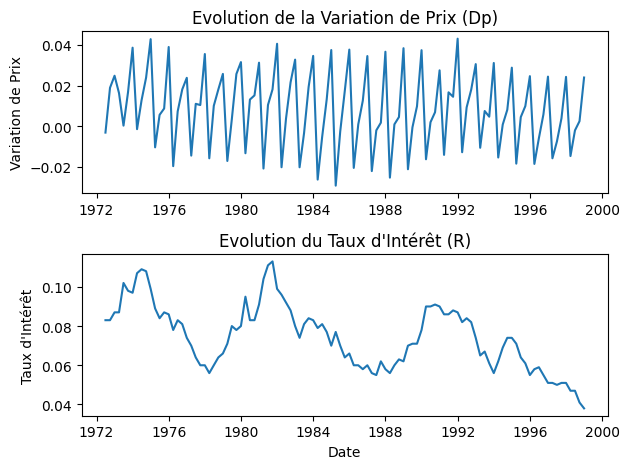

In [ ]:
# Importation de matplotlib
import matplotlib.pyplot as plt

# Création de la figure et des axes
fig, axs = plt.subplots(2)

# Création du premier graphique pour la variable 'Dp' (Variation de prix)
axs[0].plot(data.index, data['Dp'])
axs[0].set_title('Evolution de la Variation de Prix (Dp)')
axs[0].set_ylabel('Variation de Prix')

# Création du deuxième graphique pour la variable 'R' (Taux d'intérêt)
axs[1].plot(data.index, data['R'])
axs[1].set_title('Evolution du Taux d\'Intérêt (R)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Taux d\'Intérêt')

# Amélioration de la disposition
fig.tight_layout()

# Affichage des graphiques
plt.show()

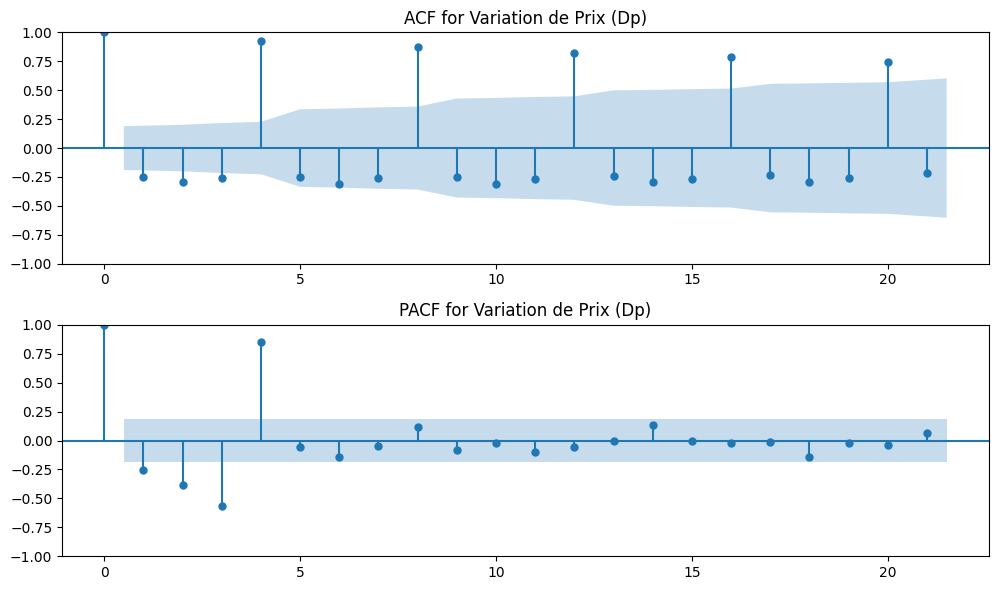

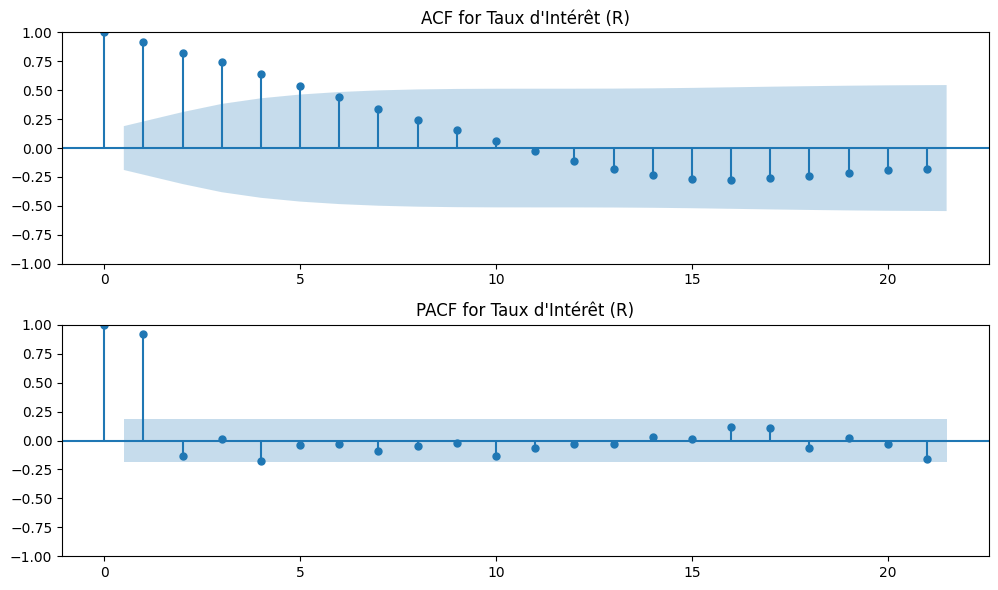

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tracé de l'ACF et du PACF pour la variable 'Dp' (Variation de prix)
fig, axs = plt.subplots(2, figsize=(10, 6))

plot_acf(data['Dp'].dropna(), ax=axs[0])
axs[0].set_title('ACF for Variation de Prix (Dp)')

plot_pacf(data['Dp'].dropna(), ax=axs[1])
axs[1].set_title('PACF for Variation de Prix (Dp)')

plt.tight_layout()
plt.show()

# Tracé de l'ACF et du PACF pour la variable 'R' (Taux d'intérêt)
fig, axs = plt.subplots(2, figsize=(10, 6))

plot_acf(data['R'].dropna(), ax=axs[0])
axs[0].set_title('ACF for Taux d\'Intérêt (R)')

plot_pacf(data['R'].dropna(), ax=axs[1])
axs[1].set_title('PACF for Taux d\'Intérêt (R)')

plt.tight_layout()
plt.show()

In [ ]:
# Importation de la bibliothèque nécessaire
from statsmodels.tsa.stattools import adfuller

# Application du test ADF à la variable 'Dp' (Variation de prix)
result_Dp = adfuller(data['Dp'].dropna())
print('--- Test ADF pour la Variation de Prix (Dp) ---')
print('Statistiques ADF : %f' % result_Dp[0])
print('p-value : %f' % result_Dp[1])
print('Valeurs Critiques :')
for key, value in result_Dp[4].items():
    print('\t%s: %.3f' % (key, value))

# Application du test ADF à la variable 'R' (Taux d'intérêt)
result_R = adfuller(data['R'].dropna())
print('--- Test ADF pour le Taux d\'Intérêt (R) ---')
print('Statistiques ADF : %f' % result_R[0])
print('p-value : %f' % result_R[1])
print('Valeurs Critiques :')
for key, value in result_R[4].items():
    print('\t%s: %.3f' % (key, value))

--- Test ADF pour la Variation de Prix (Dp) ---
Statistiques ADF : -1.680328
p-value : 0.441275
Valeurs Critiques :
	1%: -3.498
	5%: -2.891
	10%: -2.583
--- Test ADF pour le Taux d'Intérêt (R) ---
Statistiques ADF : -1.911558
p-value : 0.326644
Valeurs Critiques :
	1%: -3.495
	5%: -2.890
	10%: -2.582


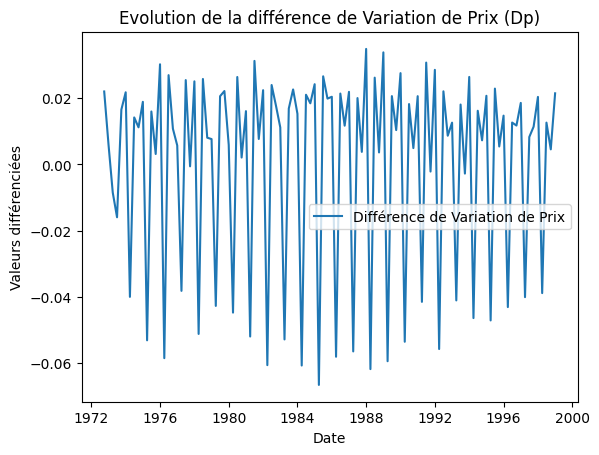

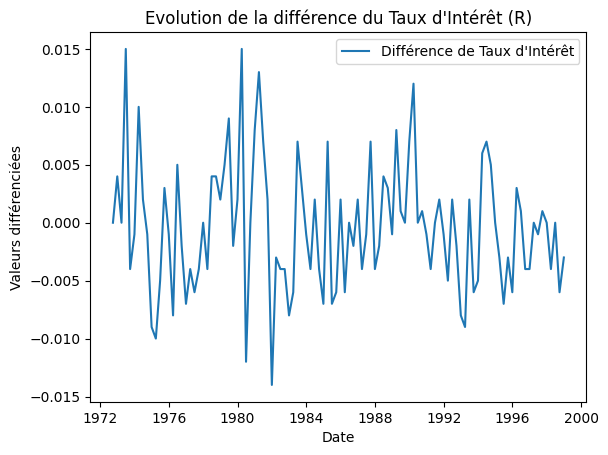

In [ ]:
# Calcul des différences
data_diff = data.diff().dropna()

# Création de la figure et des axes pour la variable 'Dp' (Variation de prix)
fig, ax = plt.subplots()
ax.plot(data_diff.index, data_diff['Dp'], label='Différence de Variation de Prix')
ax.legend()
ax.set_title('Evolution de la différence de Variation de Prix (Dp)')
ax.set_xlabel('Date')
ax.set_ylabel('Valeurs différenciées')
plt.show()

# Création de la figure et des axes pour la variable 'R' (Taux d'intérêt)
fig, ax = plt.subplots()
ax.plot(data_diff.index, data_diff['R'], label='Différence de Taux d\'Intérêt')
ax.legend()
ax.set_title('Evolution de la différence du Taux d\'Intérêt (R)')
ax.set_xlabel('Date')
ax.set_ylabel('Valeurs différenciées')
plt.show()

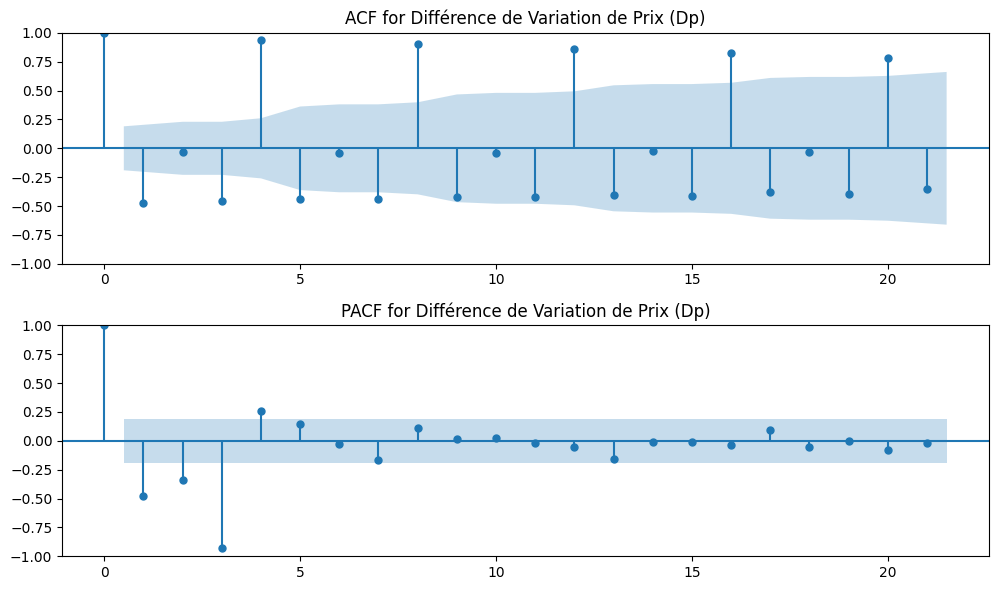

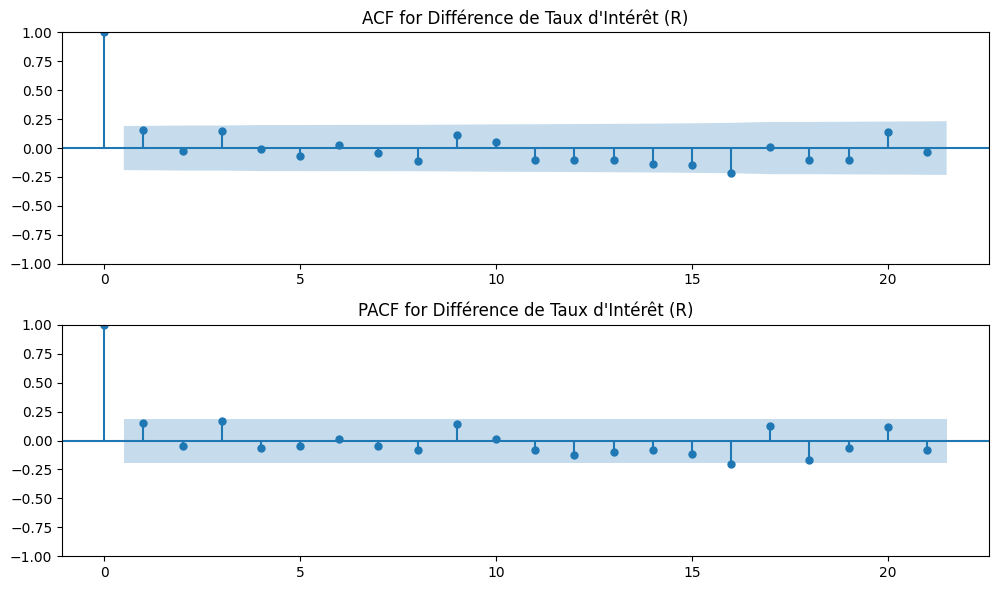

In [ ]:
# Tracé de l'ACF et du PACF pour la différence de la variable 'Dp' (Variation de prix)
fig, axs = plt.subplots(2, figsize=(10, 6))

plot_acf(data_diff['Dp'].dropna(), ax=axs[0])
axs[0].set_title('ACF for Différence de Variation de Prix (Dp)')

plot_pacf(data_diff['Dp'].dropna(), ax=axs[1])
axs[1].set_title('PACF for Différence de Variation de Prix (Dp)')

plt.tight_layout()
plt.show()

# Tracé de l'ACF et du PACF pour la différence de la variable 'R' (Taux d'intérêt)
fig, axs = plt.subplots(2, figsize=(10, 6))

plot_acf(data_diff['R'].dropna(), ax=axs[0])
axs[0].set_title('ACF for Différence de Taux d\'Intérêt (R)')

plot_pacf(data_diff['R'].dropna(), ax=axs[1])
axs[1].set_title('PACF for Différence de Taux d\'Intérêt (R)')

plt.tight_layout()
plt.show()

In [ ]:
# Application du test ADF à la différence de la variable 'Dp' (Variation de prix)
result_Dp_diff = adfuller(data_diff['Dp'].dropna())
print('--- Test ADF pour la différence de la Variation de Prix (Dp) ---')
print('Statistiques ADF : %f' % result_Dp_diff[0])
print('p-value : %f' % result_Dp_diff[1])
print('Valeurs Critiques :')
for key, value in result_Dp_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Application du test ADF à la différence de la variable 'R' (Taux d'intérêt)
result_R_diff = adfuller(data_diff['R'].dropna())
print('--- Test ADF pour la différence du Taux d\'Intérêt (R) ---')
print('Statistiques ADF : %f' % result_R_diff[0])
print('p-value : %f' % result_R_diff[1])
print('Valeurs Critiques :')
for key, value in result_R_diff[4].items():
    print('\t%s: %.3f' % (key, value))

--- Test ADF pour la différence de la Variation de Prix (Dp) ---
Statistiques ADF : -6.001211
p-value : 0.000000
Valeurs Critiques :
	1%: -3.498
	5%: -2.891
	10%: -2.583
--- Test ADF pour la différence du Taux d'Intérêt (R) ---
Statistiques ADF : -4.716843
p-value : 0.000078
Valeurs Critiques :
	1%: -3.495
	5%: -2.890
	10%: -2.582


# Analyse de la cointégration

In [ ]:
# Importation de la bibliothèque nécessaire
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Analyse de cointégration
johansen_test = coint_johansen(data[['Dp','R']].dropna(), det_order=0, k_ar_diff=1)

# Affichage des résultats
print('--- Résultats du test de cointégration de Johansen ---')
print('Valeurs propres :')
print(johansen_test.eig)
print('Statistiques de test :')
print(johansen_test.lr1)
print('Valeurs Critiques (90%, 95%, 99%) :')
print(johansen_test.cvt)

--- Résultats du test de cointégration de Johansen ---
Valeurs propres :
[0.62544417 0.02115709]
Statistiques de test :
[105.35684465   2.24533154]
Valeurs Critiques (90%, 95%, 99%) :
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In [ ]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
# Sélection du rang de cointégration
rank_test = select_coint_rank(data[['Dp','R']], det_order=0, k_ar_diff=3, method="trace", signif=0.05)

# Affichage du rang de cointégration
print('--- Rang de cointégration ---')
print(rank_test)

--- Rang de cointégration ---
Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          17.17          15.49
  1   2          3.032          3.841
-------------------------------------


In [ ]:
rank_test.rank

1

# Choix de l'ordre et estimation du modèle

In [ ]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order
# Sélection du meilleur ordre
order_result = select_order(data[['Dp', 'R']].dropna(), maxlags=10, deterministic="ci",seasons=4)
order_result.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be use

,AIC,BIC,FPE,HQIC
0,-20.74,-20.37*,9.838e-10,-20.59*
1,-20.73,-20.25,9.984e-10,-20.53
2,-20.65,-20.06,1.079e-09,-20.41
3,-20.77*,-20.08,9.561e-10*,-20.49
4,-20.71,-19.91,1.020e-09,-20.38
5,-20.68,-19.77,1.054e-09,-20.31
6,-20.64,-19.63,1.094e-09,-20.23
7,-20.59,-19.47,1.162e-09,-20.13
8,-20.52,-19.29,1.247e-09,-20.02
9,-20.51,-19.17,1.271e-09,-19.97


# Estimation du modèle

In [ ]:
model = VECM(data, deterministic="ci", seasons=4,
             k_ar_diff=order_result.selected_orders['aic'],  # =3
             coint_rank=rank_test.rank)  # =1
model_fit = model.fit()
# Affichage du sommaire
print(model_fit.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation Dp
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
season1        0.0162      0.005      3.554      0.000       0.007       0.025
season2        0.0177      0.005      3.690      0.000       0.008       0.027
season3        0.0341      0.005      7.464      0.000       0.025       0.043
L1.Dp         -0.3339      0.141     -2.364      0.018      -0.611      -0.057
L1.R           0.0677      0.095      0.715      0.474      -0.118       0.253
L2.Dp         -0.3874      0.114     -3.399      0.001      -0.611      -0.164
L2.R          -0.0030      0.095     -0.032      0.975      -0.190       0.184
L3.Dp         -0.3457      0.076     -4.524      0.000      -0.495      -0.196
L3.R           0.0204      0.092      0.222      0.824      -0.160       0.201
Det. terms outside the coint. relation & lagged e

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


# Validation du modèle

--- Résultats du test de Ljung-Box ---
       lag_1     lag_2     lag_3     lag_4     lag_5     lag_6     lag_7  \
Dp  0.949652  0.884674  0.965853  0.948604  0.950104  0.763155  0.765795   
R   0.989386  0.929686  0.982936  0.957173  0.975957  0.985227  0.985660   

       lag_8     lag_9    lag_10    lag_11    lag_12  
Dp  0.679867  0.761166  0.688763  0.725465  0.705320  
R   0.949296  0.757714  0.745538  0.756850  0.751116  


<Figure size 1000x500 with 0 Axes>

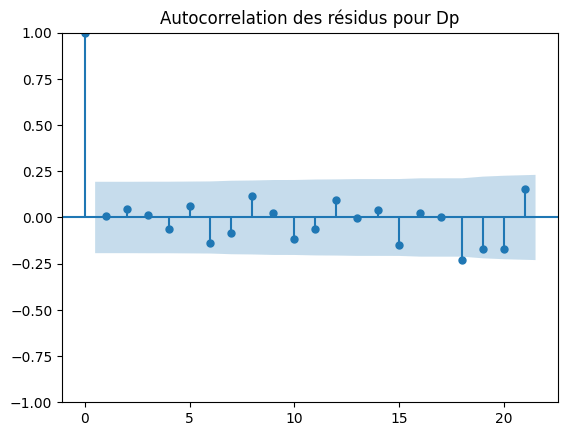

<Figure size 1000x500 with 0 Axes>

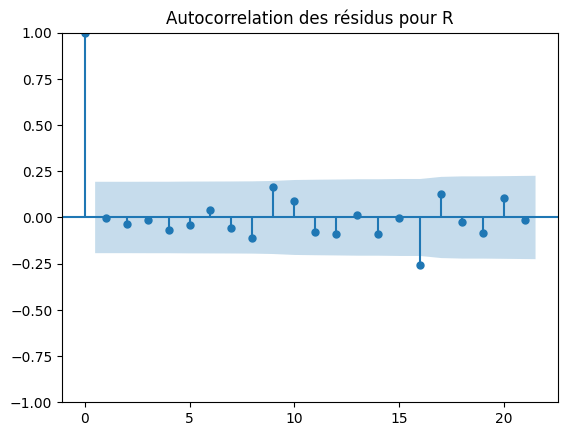

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import pandas as pd
# Extraction des résidus du modèle
residuals = model_fit.resid
# Création d'un DataFrame vide pour stocker les résultats
ljung_box_results = pd.DataFrame()

for i, column in enumerate(data.columns):
    # Effectuation du test de Ljung-Box pour chaque lag de 1 à 12
    for lag in range(1, 13):
        ljung_box = acorr_ljungbox(residuals[:, i], lags=[lag], return_df=True)
        # Ajout des résultats au DataFrame
        ljung_box_results.loc[column, f'lag_{lag}'] = ljung_box['lb_pvalue'].values[0]

print('--- Résultats du test de Ljung-Box ---')
print(ljung_box_results)

for i, column in enumerate(data.columns):


    # Tracé de l'autocorrélation des résidus pour chaque variable
    plt.figure(figsize=(10,5))
    plot_acf(residuals[:, i])
    plt.title(f'Autocorrelation des résidus pour {column}')
    plt.show()

Nous voyons que les différentes valeurs du test de Ljung-Box sont > 0.05...
Donc l'hypothèse de non auto corrélation est vérifié..

In [ ]:
from scipy.stats import jarque_bera

jb_test = jarque_bera(residuals)
print('--- Test de Jarque-Bera ---')
print('Statistique de test :', jb_test[0])
print('p-valeur :', jb_test[1])

--- Test de Jarque-Bera ---
Statistique de test : 0.6774470919039274
p-valeur : 0.7126794449752978


la p_value> 0.05 donc les résidus du modèle sont normalement disribués.

# Prévisions

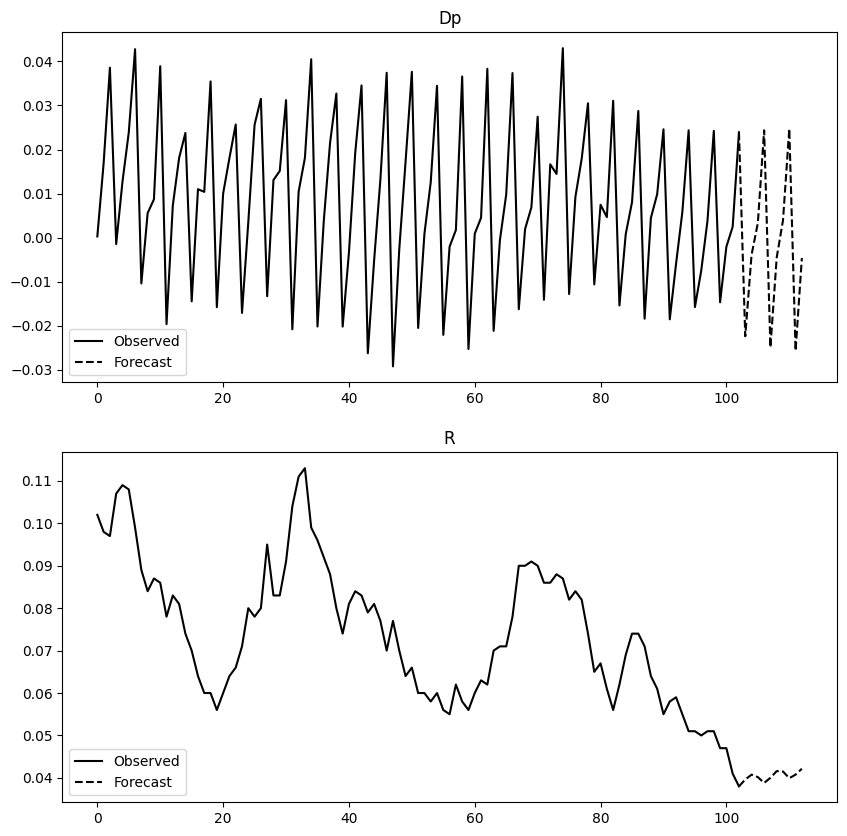

In [ ]:
model_fit.plot_forecast(steps=10, plot_conf_int=False)

# Analyse de la causalité de Granger

In [ ]:
# Effectuer le test de corrélation de Granger entre 'Dp' et 'R'
granger_results = model_fit.test_granger_causality(caused="Dp", signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
3.531,2.423,0.008,"(np.int64(4), np.int64(176))"


In [ ]:
# Effectuer le test de corrélation de Granger entre 'Dp' et 'R'
granger_results = model_fit.test_granger_causality(caused="R", signif=0.05)
granger_results.summary()

Test statistic,Critical value,p-value,df
0.7474,2.423,0.561,"(np.int64(4), np.int64(176))"
